### Lab 5
- Juan Pablo Solis
- Brandon Reyes
- Carlos Valladares

### Task 1.1 Discretizacion Imagen

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

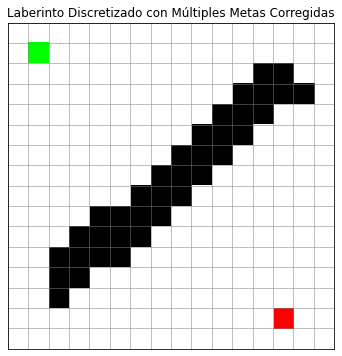

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import label

def process_maze(image_path):
    
    image = Image.open(image_path).convert("RGB")
    image_array = np.array(image)

    
    height, width, _ = image_array.shape

    
    black_walls = (image_array[:, :, 0] < 50) & (image_array[:, :, 1] < 50) & (image_array[:, :, 2] < 50)
    red_start = (image_array[:, :, 0] > 200) & (image_array[:, :, 1] < 100) & (image_array[:, :, 2] < 100)
    green_goal = (image_array[:, :, 1] > 200) & (image_array[:, :, 0] < 100) & (image_array[:, :, 2] < 100)

    
    red_positions = np.where(red_start)
    if len(red_positions[0]) > 0:
        cell_size = max(red_positions[0].max() - red_positions[0].min(), red_positions[1].max() - red_positions[1].min())
    else:
        cell_size = 10  

    grid_height = height // cell_size
    grid_width = width // cell_size
    grid_image = np.ones((grid_height, grid_width, 3), dtype=np.uint8) * 255  

    
    labeled_goals, num_goals = label(green_goal)

    
    for goal_id in range(1, num_goals + 1):
        goal_pixels = np.where(labeled_goals == goal_id)
        center_y = int(goal_pixels[0].mean()) // cell_size
        center_x = int(goal_pixels[1].mean()) // cell_size
        grid_image[center_y, center_x] = [0, 255, 0]  

    
    if len(red_positions[0]) > 0:
        red_cell_x = red_positions[1].min() // cell_size
        red_cell_y = red_positions[0].min() // cell_size
        grid_image[red_cell_y, red_cell_x] = [255, 0, 0]  

    
    for i in range(grid_height):
        for j in range(grid_width):
            block = image_array[i * cell_size:(i + 1) * cell_size, j * cell_size:(j + 1) * cell_size]
            avg_color = block.mean(axis=(0, 1))
            if avg_color[0] < 50 and avg_color[1] < 50 and avg_color[2] < 50:
                grid_image[i, j] = [0, 0, 0]  

    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(grid_image)
    ax.set_xticks(np.arange(0, grid_width, 1)-0.5, minor=True)
    ax.set_yticks(np.arange(0, grid_height, 1)-0.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.5)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title("Laberinto Discretizado con Múltiples Metas Corregidas")
    plt.show()


test_image_path = "Prueba Lab1.bmp"
process_maze(test_image_path)
